# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> (actors)
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> (genres)
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> (movie actors)
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> (movie ratings)

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

Let's install the necessary packages here

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1669693343333_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [4]:
actors_df = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header='true')
genre_df = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', header='true', sep=r'\t')
movie_actors_df = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header='true')
movie_rating_df = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

Display the schema below:

In [5]:
actors_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [6]:
#actors_df.show(5) --> shows everything
actors_df.select("primaryName","birthYear","deathYear","knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Genres

Display the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [7]:
genre_df.select("titleType","primaryTitle","genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

Display the unique categories below:

In [8]:
genre_df.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [9]:
genre_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors

Display the schema below:

In [10]:
movie_actors_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 10 rows below

In [11]:
movie_actors_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

## Movie Ratings

Display the schema below:

In [12]:
movie_rating_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [13]:
from pyspark.sql.functions import col
movie_rating_df.sort(col("numVotes").desc()).show(10)
#movie_rating_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt8860450|          6.3|    9991|
|tt2032572|          5.2|    9991|
|tt7201150|          8.5|     999|
|tt7508752|          7.9|     999|
|tt4082482|          6.8|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [14]:
print(f"Number of columns in Actors table: {len(actors_df.dtypes)}")
print(f"Number of rows in Actors table: {actors_df.count()}\n")

print(f"Number of columns in Genres table: {len(genre_df.dtypes)}")
print(f"Number of rows in Genres table: {genre_df.count()}\n")

print(f"Number of columns in Movie Actors table: {len(movie_actors_df.dtypes)}")
print(f"Number of rows in Movie Actors table: {movie_actors_df.count()}\n")

print(f"Number of columns in Movie Ratings table: {len(movie_rating_df.dtypes)}")
print(f"Number of rows in Movie Ratings table: {movie_rating_df.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9706922

Number of columns in Genres table: 9
Number of rows in Genres table: 6321302

Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36468817

Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [15]:
genre_df.select("tconst","titleType", "genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [16]:
from pyspark.sql.functions import split, col, explode

# pyspark.sql.functions.explode(col) Returns a new row for each element in the given array or map. 

genre_exploded_df = genre_df.withColumn('genres',explode(split('genres',",")))\
    .withColumnRenamed("genres", "genre")

genre_exploded_df.select("tconst","titleType", "genre").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie category?**

In [17]:
genre_exploded_df.select("genre")\
    .distinct()\
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [18]:
genre_exploded_df.select("genre")\
    .distinct()\
    .show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Short      |
|Film-Noir  |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
+-----------+
only showing top 20 rows

**Oops! Something is off!**

In [19]:
from pyspark.sql.functions import split, col, explode
nll = '\\N'
genre_exploded_nNA_df=genre_exploded_df.filter(col("genre") != nll)
genre_exploded_nNA_df.select("genre") \
    .distinct() \
    .show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
+-----------+
only showing top 20 rows

In [20]:
genre_exploded_nNA_df.select("genre") \
    .distinct() \
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [21]:
# Join two tables
Rating_and_genre_df = genre_exploded_nNA_df.join(movie_rating_df, genre_exploded_nNA_df.tconst == movie_rating_df.tconst, "inner")\
    .filter(col("titleType") =="movie")\
    .select("genre", "averageRating")
Rating_and_genre_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [22]:
from pyspark.sql.functions import mean, count, sum, col, max
Rating_and_genre_df=Rating_and_genre_df.withColumn("averageRating", col("averageRating").cast("float"))
Rating_and_genre_df=Rating_and_genre_df.groupBy("genre").agg(
    mean("averageRating").alias("avg_rating"))
Rating_and_genre_df.show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Mystery    |5.940437537126316|
|Musical    |6.203246053185319|
|Action     |5.718734067904495|
|Sport      |6.600145190943391|
|Talk-Show  |5.800000190734863|
|Romance    |6.125714179294426|
|Thriller   |5.625967567519544|
|Reality-TV |6.379310377712907|
|Family     |6.250560452699635|
|Fantasy    |5.924820762891499|
|History    |6.822718117193864|
|Animation  |6.326203749467441|
|Film-Noir  |6.636246780503378|
|Short      |7.259999942779541|
|Sci-Fi     |5.325150006900168|
|News       |7.200916040944689|
|Drama      |6.288080211097538|
|Documentary|7.245469805371099|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
+-----------+-----------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [23]:
Rating_and_genre_sorted_df = Rating_and_genre_df.sort(col("avg_rating").desc()) 
Rating_and_genre_sorted_df.show(20, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Short      |7.259999942779541|
|Documentary|7.245469805371099|
|News       |7.200916040944689|
|Biography  |6.983637643044585|
|Game-Show  |6.974999904632568|
|History    |6.822718117193864|
|Music      |6.752020207214588|
|Film-Noir  |6.636246780503378|
|Sport      |6.600145190943391|
|War        |6.483807036278403|
|Reality-TV |6.379310377712907|
|Animation  |6.326203749467441|
|Drama      |6.288080211097538|
|Family     |6.250560452699635|
|Musical    |6.203246053185319|
|Romance    |6.125714179294426|
|Crime      |6.026013333109149|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Mystery    |5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

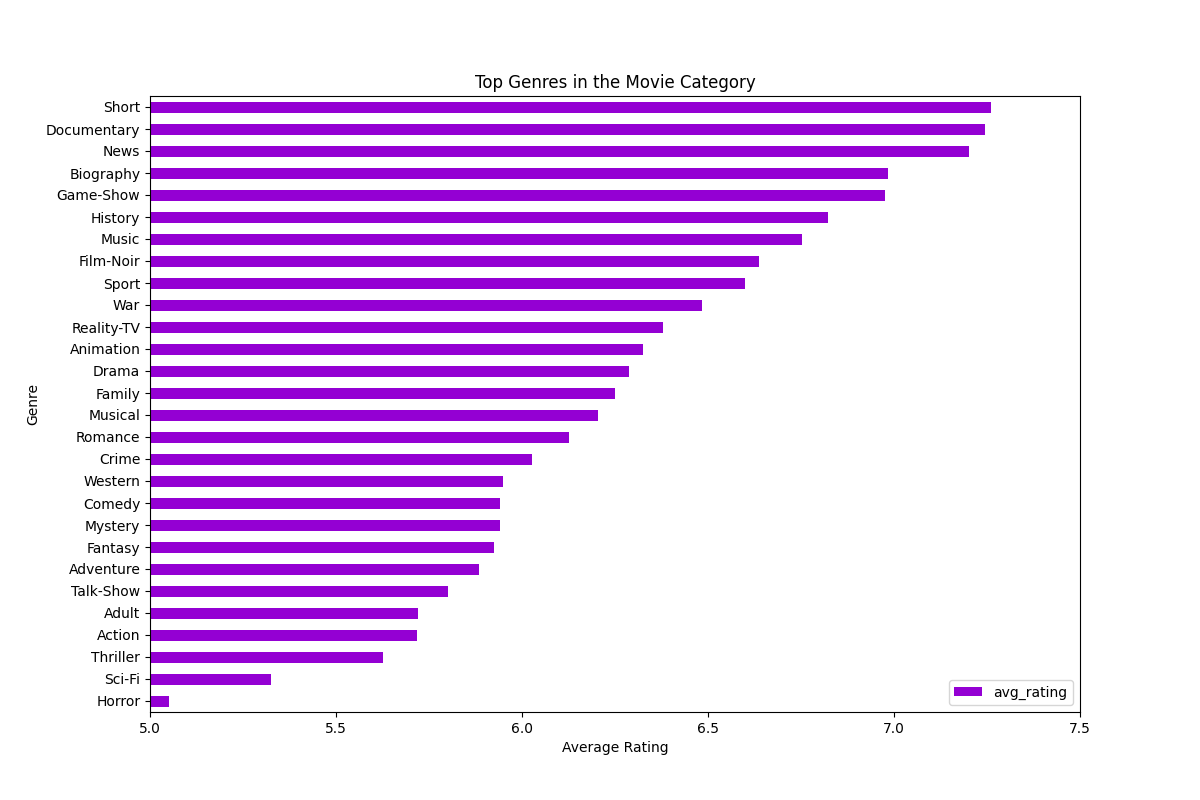

In [24]:
Rating_and_genre_pddf = Rating_and_genre_sorted_df.toPandas().sort_values(by=["avg_rating"])
Rating_and_genre_pddf.plot(kind="barh", x="genre", figsize=(12,8), color="darkviolet")
plt.ylabel("Genre")
plt.xlabel("Average Rating")
plt.title("Top Genres in the Movie Category")
plt.xlim([5, 7.5])
%matplot plt 

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [25]:
movie_actors_df.select("tconst" ,"category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [26]:
movie_actors_df.select("category")\
    .distinct()\
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [27]:
movie_actors_df.select("category")\
    .distinct()\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [28]:
from pyspark.sql.functions import avg, mean, count, sum, col, max
movie_actors_df.groupBy("category").agg(
    count("category").alias("count"))\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actress            |6325097|
|producer           |2197866|
|production_designer|285924 |
|writer             |4811596|
|actor              |8493701|
|cinematographer    |1300404|
|archive_sound      |2143   |
|archive_footage    |209035 |
|self               |6153089|
|editor             |1197669|
|composer           |1313187|
|director           |4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [29]:
from pyspark.sql.functions import avg, mean, count, sum, col, max
category_sorted_df = movie_actors_df.groupBy("category").agg(
    count("category").alias("count"))\
    .sort(col("count").desc()) 
category_sorted_df.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actor              |8493701|
|actress            |6325097|
|self               |6153089|
|writer             |4811596|
|director           |4179106|
|producer           |2197866|
|composer           |1313187|
|cinematographer    |1300404|
|editor             |1197669|
|production_designer|285924 |
|archive_footage    |209035 |
|archive_sound      |2143   |
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

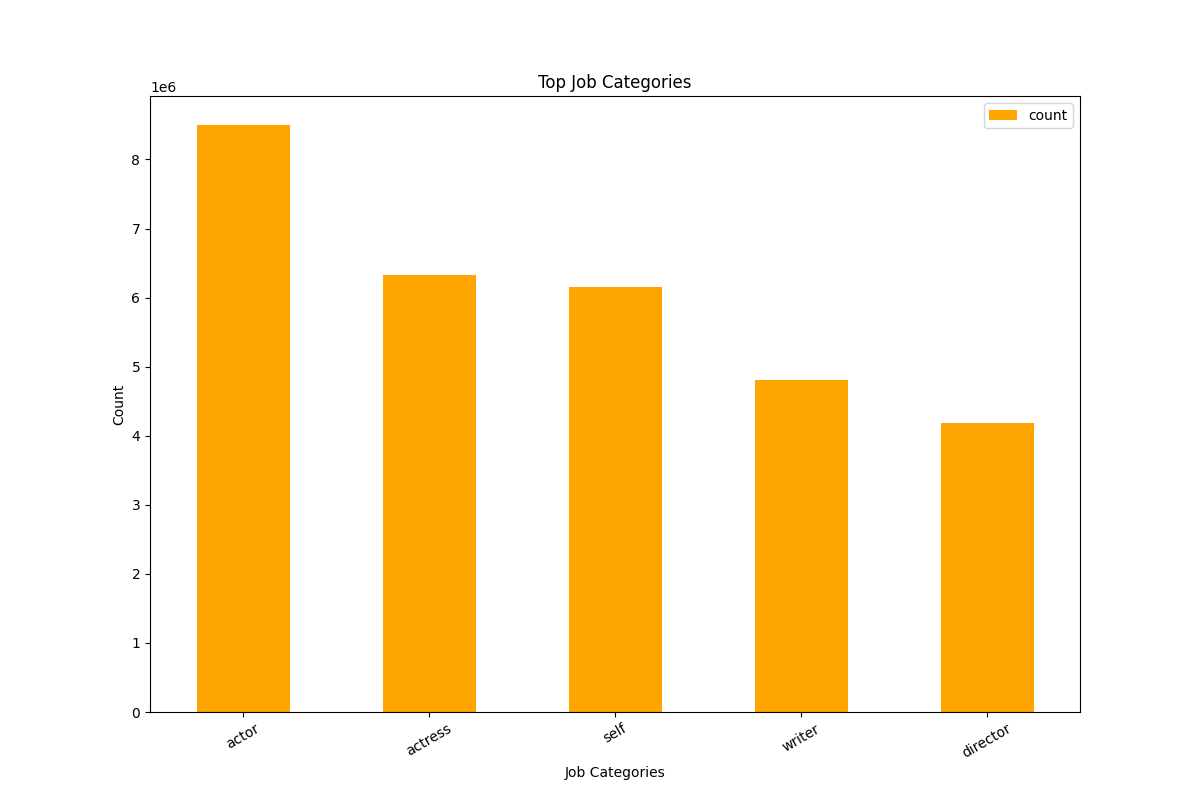

In [30]:
category_sorted_df.createOrReplaceTempView('Categories')
top_5_jobs = spark.sql(
'''
SELECT *
FROM Categories
LIMIT 5
'''
)

top_5_jobs.toPandas().plot.bar(x="category", figsize=(12,8), color ="orange")
plt.title("Top Job Categories")
plt.xlabel("Job Categories")
plt.ylabel("Count")
plt.xticks(rotation=30)
%matplot plt

# PART 4 - Answer to the following questions:

## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

First join actors, genres, and movie actors on each other

In [31]:
#Need to edit actors_df first to expand knownForTitles (array of tconsts)
actors_df_expand = actors_df.withColumn('knownForTitles',explode(split('knownForTitles',",")))\
    .select("nconst", "primaryName", "knownForTitles")

join_actors_df = actors_df_expand.join(movie_actors_df, on=["nconst"], how="inner")\
    .join(genre_exploded_nNA_df, on=["tconst"], how="inner")\
    .filter(col("titleType") == "movie")\
    .select("tconst", "primaryName", "category", "primaryTitle", "startYear")\
    .distinct()

johnny_depp_df = join_actors_df.filter(col("primaryName") == "Johnny Depp")\
                            .select("tconst", "primaryTitle")
helena_carter_df = join_actors_df.filter(col("primaryName") == "Helena Bonham Carter")\
                                .select("tconst", "primaryTitle")

helena_carter_df.join(johnny_depp_df, on=["primaryTitle"], how="inner")\
                .select("primaryTitle")\
                .show(truncate=False)

#Old code
#from pyspark.sql.functions import avg, mean, count, sum, col, max
#jd_and_hbc_df=join_actors_df.filter((col("primaryName")=="Johnny Depp") |\
 #                                   (col("primaryName")=="Helena Bonham Carter"))\
  #  .groupBy("primaryTitle").agg(count("primaryTitle").alias("num_repeats"))\
   # .filter(col("num_repeats") >1)\ # if title repeats more than once, both were in the movie
    #.select("primaryTitle")\
    #.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

In [32]:
join_actors_df.select("primaryTitle", "startYear")\
    .filter((col("startYear") > 2010) & (col("primaryName") == "Brad Pitt"))\
    .sort(col("startYear").desc())\
    .distinct()\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Irresistible                     |2020     |
|Kajillionaire                    |2020     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|The King                         |2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Voyage of Time: Life's Journey   |2016     |
|Allied                           |2016     |
|By the Sea                       |2015     |
|Hitting the Apex                 |2015     |
|The Big Short                    |2015     |
|Fury                             |2014     |
|12 Years a Slave                 |2013     |
|Kick-Ass 2                       |2013     |
|World War Z                      |2013     |
|Killing Them Softly              |2012     |
|Moneyball                        

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [33]:
from pyspark.sql.functions import avg, mean, count, sum, col, max
zendaya_df = join_actors_df.filter((col("primaryName") == "Zendaya") &\
                                   (col("category") == "actress") &\
                                   (col("startYear") != "\\N"))
zendaya_df.groupBy("startYear").count()\
    .sort(col("startYear").desc())\
    .show(truncate=False) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [34]:
movies = genre_df.join(movie_rating_df, on="tconst", how="inner")\
                        .select("primaryTitle", "averageRating")\
                        .filter((col("startYear") == 2019) &\
                                (col("averageRating") > 9.7) &\
                                (col("titleType")=="movie"))\
                        .withColumn("averageRating", col("averageRating").cast("float"))\
                        .sort(col("averageRating").desc())\
                        .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|Kirket                                           |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|Love in Kilnerry                                 |10.0         |
|A Grunt's Life                                   |10.0         |
|A Medicine for the Mind                          |10.0         |
|The Butcher Baronet                              |10.0         |
|Puritan: All of Life to The Glory of God         |9.9          |
|Superhombre                                      |9.9          |
|The Cardinal                                     |9.9          |
|Kamen Rid

## Extra Credit - Analysis of your choice

Try and analyze some interesting dimension to this data. You should specify the question in your Project2_Analysis.ipynb. 

You must join at least two datasets.


In [36]:
# Most Voted for Comedy Movies
genre_rating = genre_exploded_nNA_df.join(movie_rating_df, on=["tconst"], how="inner")\
    .select("startYear","primaryTitle", "genre", "numVotes", "averageRating", "titleType")\
    .withColumn("numVotes", col("numVotes").cast("int"))\
    .filter((col("genre") == "Comedy") &(col("titleType") == "movie"))\
    .sort(col("numVotes").desc())

genre_rating.select("primaryTitle", "startYear", "averageRating","numVotes").show(truncate=False)

# Most Voted for Comedy Movie was Guardians of the Galaxy

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------+---------+-------------+--------+
|primaryTitle                |startYear|averageRating|numVotes|
+----------------------------+---------+-------------+--------+
|Guardians of the Galaxy     |2014     |8.0          |980782  |
|Back to the Future          |1985     |8.5          |965539  |
|Finding Nemo                |2003     |8.1          |889815  |
|Up                          |2009     |8.2          |869619  |
|The Truman Show             |1998     |8.1          |861373  |
|Deadpool                    |2016     |8.0          |845855  |
|Toy Story                   |1995     |8.3          |822978  |
|Monsters, Inc.              |2001     |8.0          |760273  |
|Snatch                      |2000     |8.3          |734562  |
|Toy Story 3                 |2010     |8.3          |707372  |
|The Intouchables            |2011     |8.5          |698385  |
|The Hangover                |2009     |7.7          |682340  |
|The Big Lebowski            |1998     |

In [37]:
# Which movies did people have multiple roles (actor, director, producer, etc)?
# Sort in descending order 
join_actors_df.groupBy("primaryName","primaryTitle","startYear")\
            .agg(count("category").alias("num_roles"))\
            .filter((col("num_roles") > 1) & (col("startYear")!= nll))\
            .sort(col("num_roles").desc())\
            .show(truncate=False)

# Appears to be mostly people who worked on independent movies and foreign movies

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------+--------------------------------------+---------+---------+
|primaryName          |primaryTitle                          |startYear|num_roles|
+---------------------+--------------------------------------+---------+---------+
|Jorge Silva Melo     |Ângelo de Sousa - Tudo o Que Sou Capaz|2010     |7        |
|Adrian Wallace       |Because We Are                        |2020     |6        |
|Saint Chris          |Because We Are                        |2020     |6        |
|Larry Enright        |How many times can God save me        |2014     |5        |
|Zo Williams          |Escape from Candyland                 |2017     |4        |
|Pyotr Buslov         |Boomerang                             |2020     |4        |
|Larry Enright        |Dead and Deleted The Ted Giles Story  |2019     |4        |
|Domini Quinn Supastar|Escape from Candyland                 |2017     |4        |
|William Shakespeare  |Hamlet                                |1964     |4        |
|Dan

In [38]:
# Kenneth Branagh is known as a Shakespearian actor. Which plays has he worked on.
# Shakespeare plays Kenneth Branagh has worked on and in what role (can include multiple roles)

shakespeare_df = actors_df.join(movie_actors_df, actors_df.nconst == movie_actors_df.nconst, how ="inner")\
                .join(genre_exploded_nNA_df, on=["tconst"], how="inner")\
                .filter((col("primaryName") == "William Shakespeare") & (col("category") == "writer"))\
                .select("tconst", "primaryTitle", "startYear").distinct()
                # all shakespeare play movies

ken_bra_df = shakespeare_df.join(movie_actors_df, on=["tconst"], how ="inner")\
            .join(actors_df, on=["nconst"], how="inner")\
            .filter(col("primaryName") == "Kenneth Branagh")\
            .select("primaryTitle", "category")\
            .show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------------+--------+
|primaryTitle                           |category|
+---------------------------------------+--------+
|Othello                                |actor   |
|Love's Labour's Lost                   |actor   |
|Branagh Theatre Live: The Winter's Tale|actor   |
|Much Ado About Nothing                 |actor   |
|Henry V                                |actor   |
|Macbeth                                |actor   |
|Discovering Hamlet                     |self    |
|Hamlet                                 |actor   |
|Symphony for the Spire                 |self    |
|As You Like It                         |director|
+---------------------------------------+--------+

In [39]:
# Top 10 Highest Rated Robin Williams movies
join_4_df = join_actors_df.join(movie_rating_df, on="tconst", how="inner")\
                        .withColumn("averageRating", col("averageRating").cast("float"))\

join_4_df.select("primaryTitle", "averageRating")\
        .filter((col("primaryName") == "Robin Williams"))\
        .sort(col("averageRating").desc())\
        .show(10, truncate=False)

# Robin Williams' highest rated movie was Good Will Hunting, the only movie he received an Oscar for

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------+-------------+
|primaryTitle                       |averageRating|
+-----------------------------------+-------------+
|Good Will Hunting                  |8.3          |
|Dead Poets Society                 |8.1          |
|Aladdin                            |8.0          |
|Robin Williams: Come Inside My Mind|8.0          |
|Awakenings                         |7.8          |
|Dreams with Sharp Teeth            |7.8          |
|Emmanuel's Gift                    |7.6          |
|The Fisher King                    |7.5          |
|Good Morning, Vietnam              |7.3          |
|Insomnia                           |7.2          |
+-----------------------------------+-------------+
only showing top 10 rows

In [55]:
# What are the names of the movies actors are known for? Only released movies

actors_df_expand.join(genre_df, actors_df_expand.knownForTitles == genre_df.tconst, how="inner")\
                .select("primaryName", "primaryTitle", "startYear")\
                .filter((col("startYear")!= nll) & (col("startYear") <= 2022))\
                .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------------------+---------+
|primaryName     |primaryTitle          |startYear|
+----------------+----------------------+---------+
|Tom Green       |The X-Ray Fiend       |1897     |
|Henry Short     |A Sea Cave Near Lisbon|1896     |
|Robert W. Paul  |The Deserter          |1898     |
|Lidia Balogh    |A táncz               |1901     |
|Ilona Berzetey  |A táncz               |1901     |
|Lujza Blaha     |A táncz               |1901     |
|Aranka Hegyi    |A táncz               |1901     |
|Kálmán Kenedich |A táncz               |1901     |
|Aurel Kern      |A táncz               |1901     |
|Kornerek        |A táncz               |1901     |
|Margit Maróthy  |A táncz               |1901     |
|Emilia Márkus   |A táncz               |1901     |
|Linda Niko      |A táncz               |1901     |
|Emilia Nirschy  |A táncz               |1901     |
|Gyula Pekár     |A táncz               |1901     |
|Ilka Pálmay     |A táncz               |1901     |
|Ákos Ráthon